# Github Repo Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

import sys
import os

from main import aggregate_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.testDataImporter import TestDataImporter

## Data Aggregation

In [2]:
importer = TestDataImporter('data/testset.csv')
data = aggregate_data(importer.trainset.repos + importer.testset.repos)
y_data = np.array(importer.trainset.classification + importer.testset.classification)
data[:5]

,repo,hw_terminology_files,up_to_dateness,file_folder_ratio,watcher_count,avg_entropy,hw_terminology_commits,edu_mail_ratio,repo_size,file_count,forks_count,open_issue_count,is_io_page,html_count,avg_folder_depth
0,https://github.com/mpv-player/mpv,0,2.605221e+04,9.661538,4769,0.607567,142,0.005291,77702,628,646,348,0,0,2.250000
1,https://github.com/AllThingsSmitty/jquery-tips...,0,1.104032e+07,2.120000,3846,0.606200,0,0.000000,252,53,438,3,0,0,2.625000
2,https://github.com/Hengjie/pdf.js,0,3.952726e+06,7.064865,0,0.691902,16,0.011194,59299,1307,0,0,0,33,2.173913
3,https://github.com/Nameless13/learngit,2,2.046372e+06,3.739583,0,0.599076,0,0.000000,266,359,0,0,0,0,5.316667
4,https://github.com/Kozlov-V/TSMessages,0,6.320647e+07,4.820513,0,0.611392,1,0.024390,2012,376,0,0,0,0,3.784314


## Visualizations

we want to compare stuff

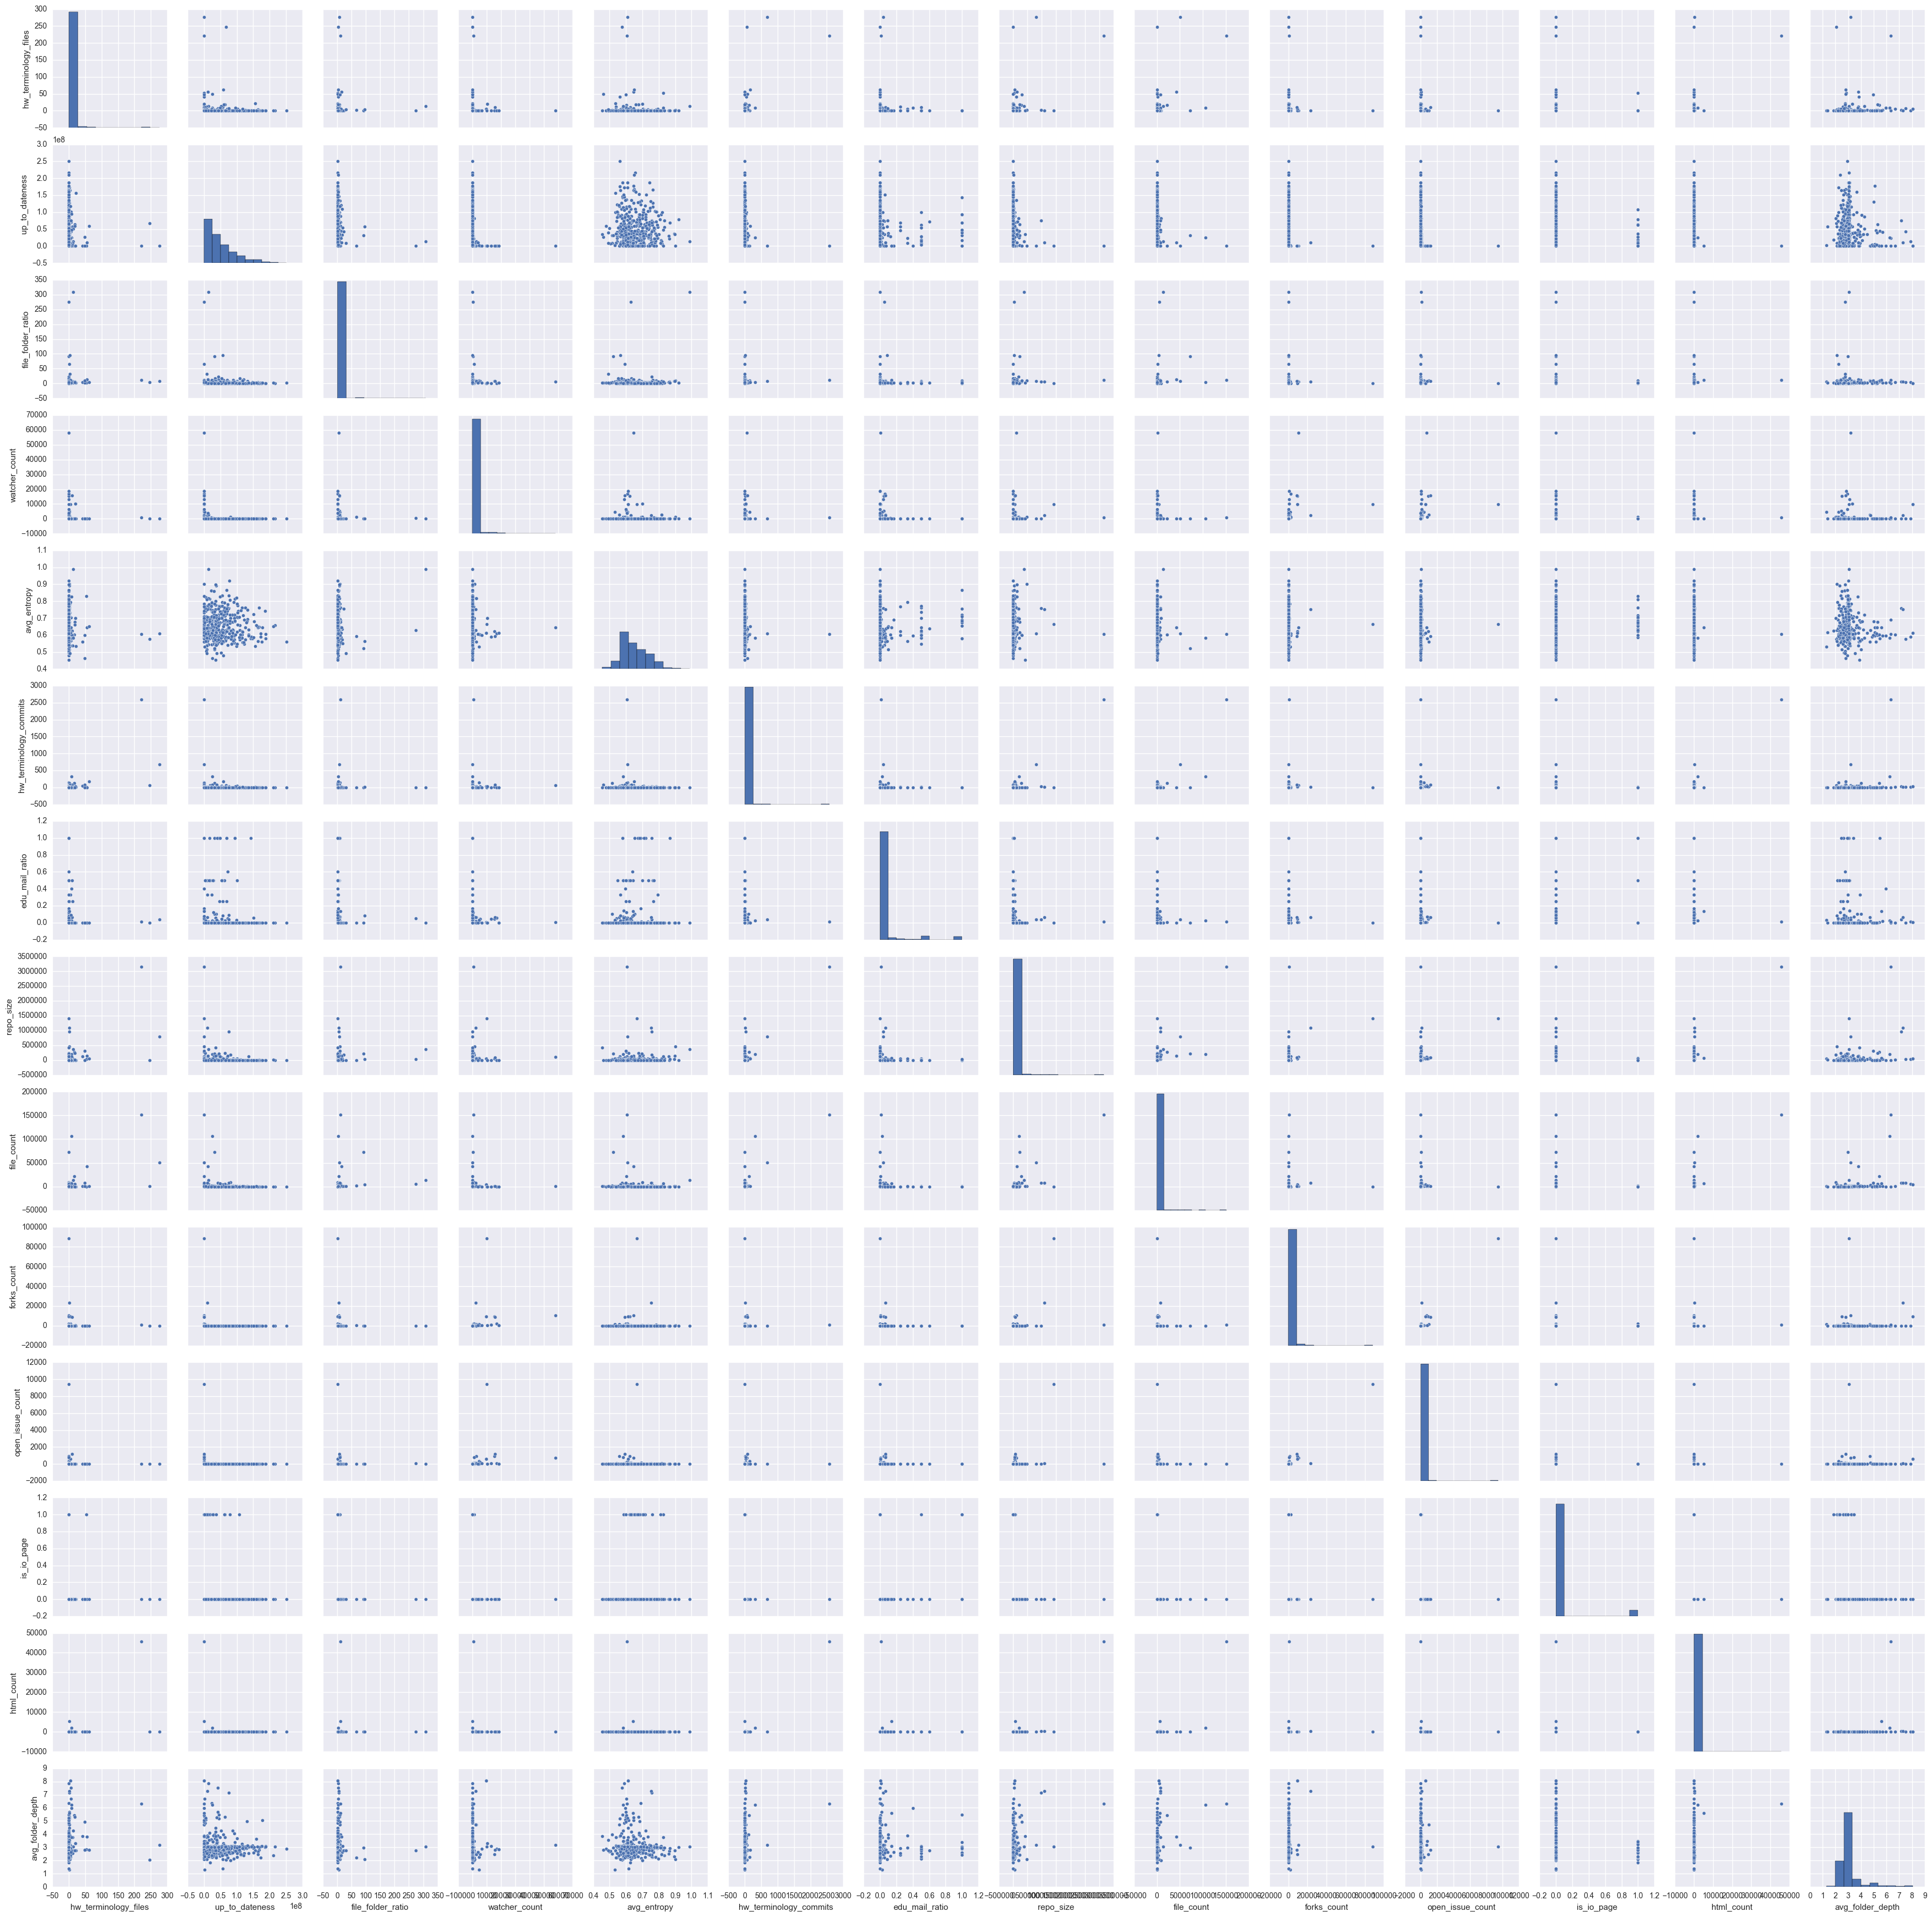

In [3]:
sbn.pairplot(data)

In [4]:
#norm_data = data
metric_list = list(metricCollection.keys())
#for metric in metric_list:
#    print(data[metric].describe())

In [5]:
data.columns

Index(['repo', 'hw_terminology_files', 'up_to_dateness', 'file_folder_ratio',
       'watcher_count', 'avg_entropy', 'hw_terminology_commits',
       'edu_mail_ratio', 'repo_size', 'file_count', 'forks_count',
       'open_issue_count', 'is_io_page', 'html_count', 'avg_folder_depth'],
      dtype='object')

In [6]:
# normalize distribution
norm_data = pd.DataFrame()
for metric in metric_list:
    norm_data[metric] = np.log(data[metric] + 1)
    norm_data[metric] = (norm_data[metric] - norm_data[metric].min()) / (norm_data[metric].max() - norm_data[metric].min())

norm_data['avg_entropy'] = data['avg_entropy']
norm_data[:5]

,hw_terminology_files,up_to_dateness,file_folder_ratio,watcher_count,avg_entropy,hw_terminology_commits,edu_mail_ratio,repo_size,file_count,forks_count,open_issue_count,is_io_page,html_count,avg_folder_depth
0,0.000000,0.163231,0.330250,0.772247,0.607567,0.631514,0.007613,0.752535,0.405086,0.568263,0.639894,0.0,0.000000,0.253733
1,0.000000,0.714940,0.086028,0.752640,0.606200,0.000000,0.000000,0.369789,0.138886,0.534210,0.151507,0.0,0.000000,0.333086
2,0.000000,0.621259,0.274775,0.000000,0.691902,0.360522,0.016060,0.734472,0.484467,0.000000,0.000000,0.0,0.328676,0.236519
3,0.195343,0.561216,0.169127,0.000000,0.599076,0.000000,0.000000,0.373389,0.344582,0.000000,0.000000,0.0,0.000000,0.736634
4,0.000000,0.874077,0.209958,0.000000,0.611392,0.088202,0.034765,0.508392,0.349585,0.000000,0.000000,0.0,0.000000,0.534729


In [7]:
norm_data['hw_terminology_commits'].describe()

count    448.000000
mean       0.079566
std        0.151185
min        0.000000
25%        0.000000
50%        0.000000
75%        0.088202
max        1.000000
Name: hw_terminology_commits, dtype: float64

In [8]:
def boxplots(data):
    h = int(len(metric_list) / 2) + 1
    fig, axes = plt.subplots(nrows=h, ncols=2, figsize=(16, 20))
    for i, metric in enumerate(metric_list):
        x = i % 2
        y = int(i / 2)
        data_per_metric = data[metric]
        
        classes = np.unique(y_data)
        data_per_class = []
        for cls in classes:
            data_per_class.append(data_per_metric[y_data == cls])
        
        axes[y, x].boxplot(data_per_class, labels=classes)
        axes[y, x].set_title(metric)
        axes[y, x].set_ylim([-0.2, 1.1])

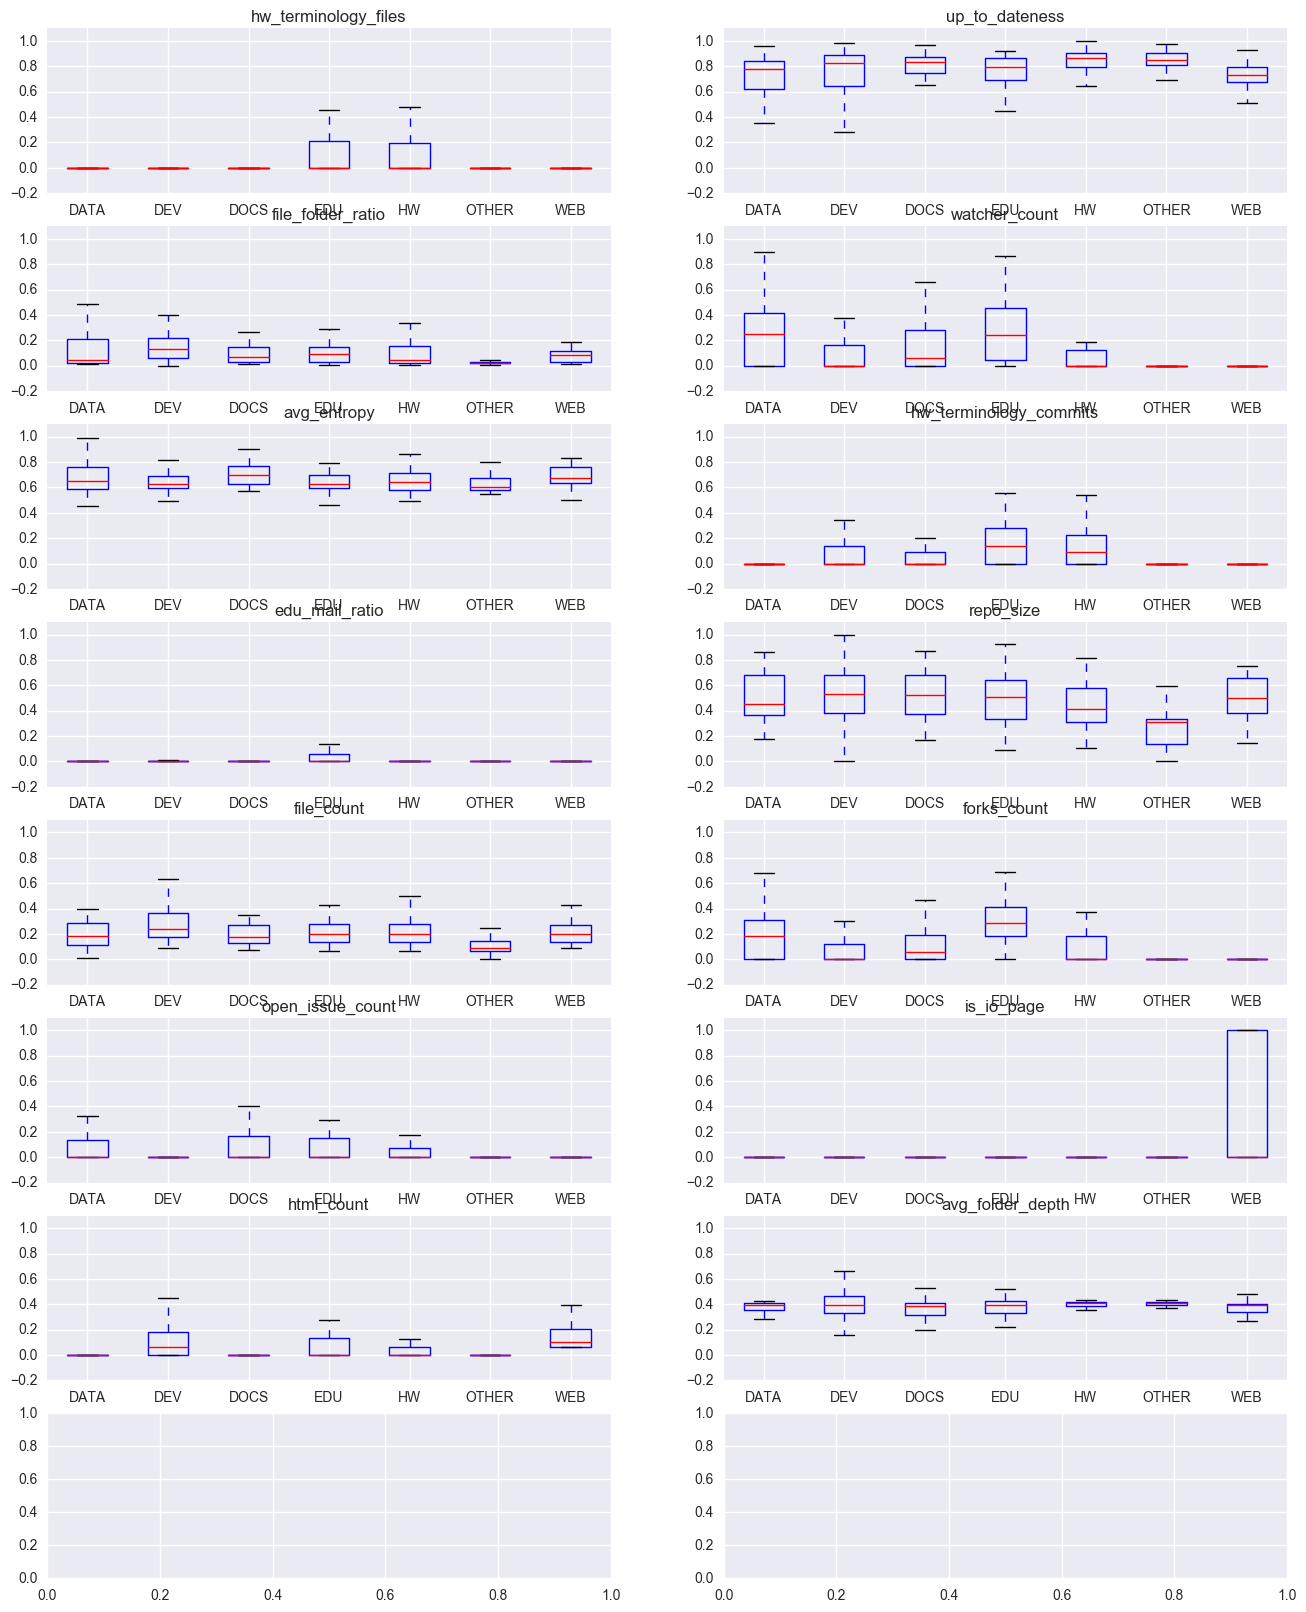

In [9]:
boxplots(norm_data)

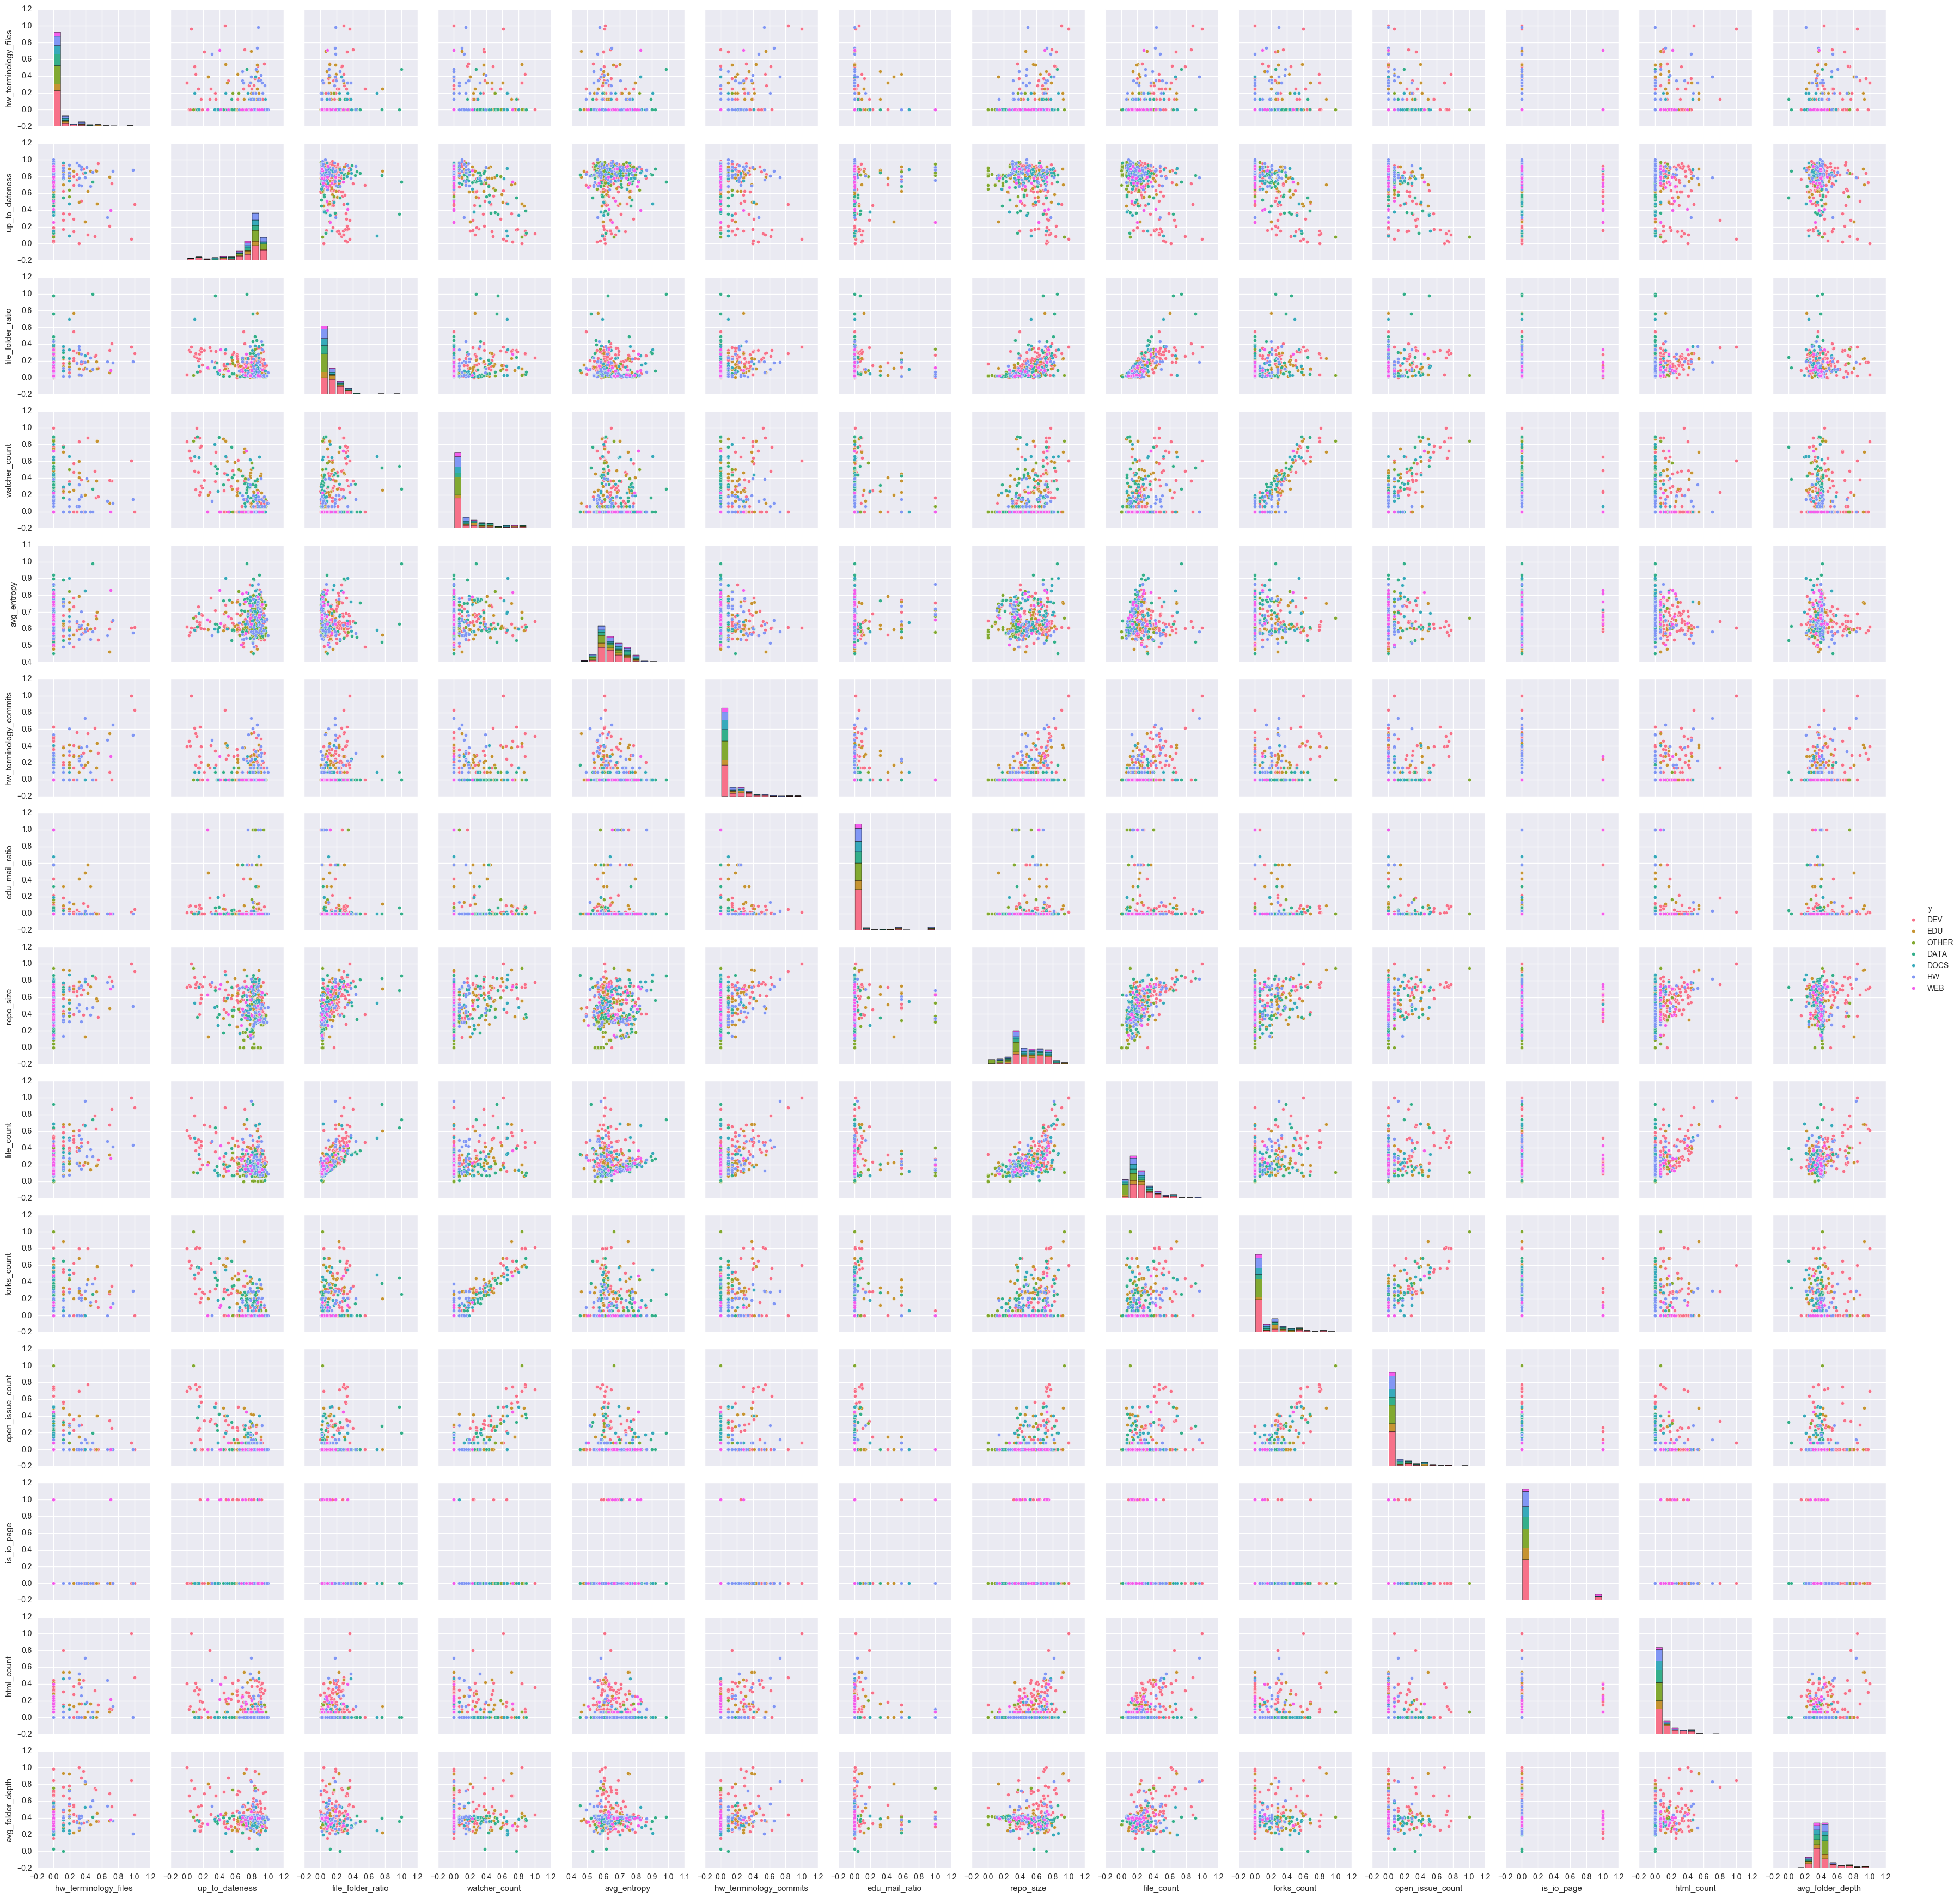

In [10]:
plot_data = norm_data
plot_data['y'] = y_data
pplot = sbn.pairplot(norm_data, hue='y')
pplot.savefig('colored_pairplot.png')

In [8]:
categories = pd.Series(importer.trainset.classification + importer.testset.classification)
categories[norm_data['file_folder_ratio'] > 0.5]
data[norm_data['file_folder_ratio'] > 0.5]
pd.concat([categories[norm_data['file_folder_ratio'] > 0.5], data[norm_data['file_folder_ratio'] > 0.5]], axis=1)


,0,repo,file_folder_ratio,avg_entropy,hw_terminology_commits,repo_size,open_issue_count,file_count,edu_mail_ratio,watcher_count,up_to_dateness,html_count,is_io_page,hw_terminology_files,avg_folder_depth,forks_count
56,DATA,https://github.com/recalbox/recalbox-gamelists,308.977778,0.987696,0,373046,5,13904,0.000000,19,1.412706e+07,0,0,14,3.043478,17
250,DATA,https://github.com/tategallery/collection,91.664987,0.522205,0,221119,12,72782,0.000000,321,3.224559e+07,0,0,0,2.962677,77
304,EDU,https://github.com/XQueryInstitute/Course-Mate...,95.585366,0.564987,0,36330,0,3919,0.083333,16,5.771860e+07,3,0,3,2.107143,9
322,DOCS,https://github.com/github/dmca,66.518519,0.594104,0,2830,0,1796,0.000000,1373,1.174190e+04,0,0,2,2.222222,264
397,DEV,https://github.com/Top-Ranger/bakery,31.305556,0.492186,0,371,0,1127,0.000000,0,9.017049e+06,0,0,3,2.772727,0
407,DATA,https://github.com/OpenExoplanetCatalogue/open...,274.350000,0.627682,0,27762,101,5487,0.050000,397,2.066962e+05,0,0,0,2.750000,167


In [9]:
#fig = plt.figure(figsize=(16,8))
def bar_plots(data):
    f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

    index = np.arange(len(data))
    for i, metric in enumerate(metricCollection):
        ax = axarr[i]
        ax.bar(index,
            data[metric],
            0.7, # barwdith
            label=metric
        )
        ax.set_title(metric)

    plt.xticks(index + 0.35, index)
    None

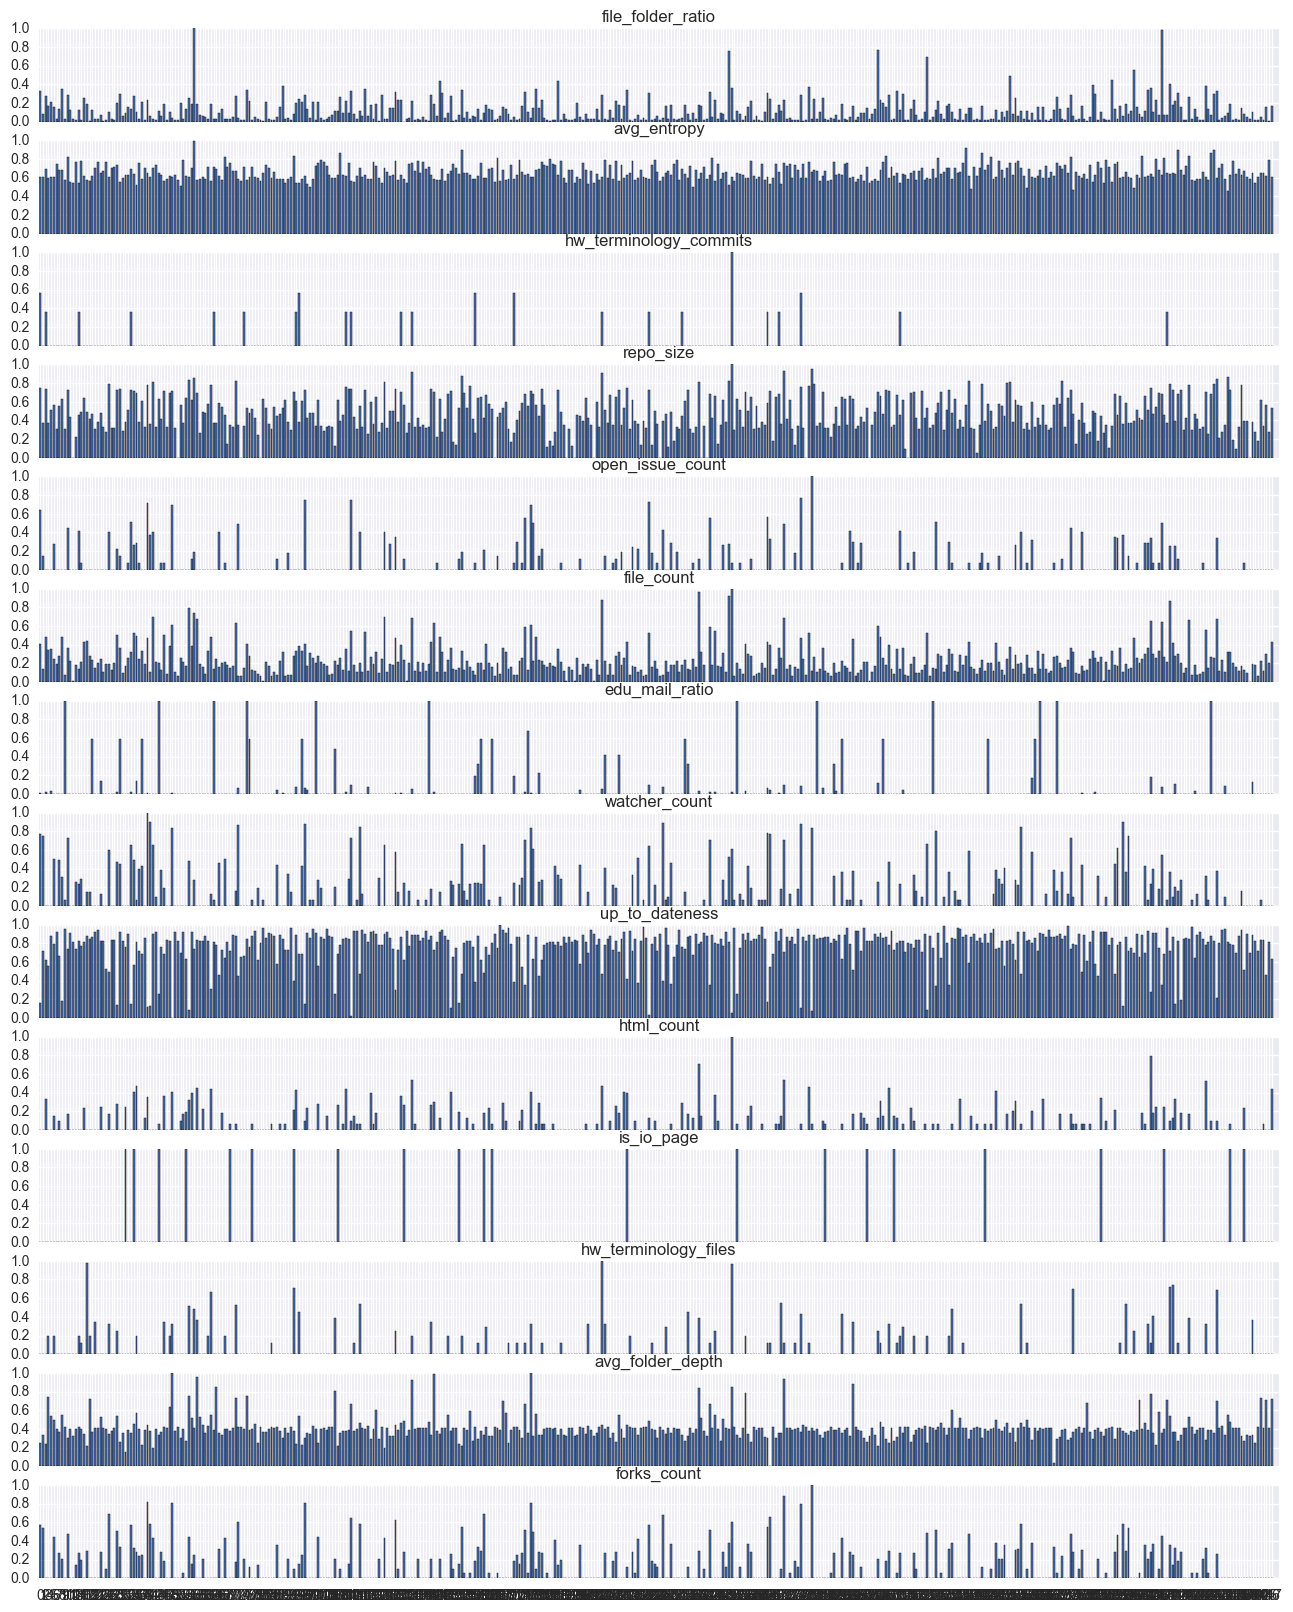

In [10]:
bar_plots(norm_data)

## TSNE

In [13]:
import sklearn
import sklearn.manifold

In [14]:
categories = np.array(importer.trainset.classification + importer.testset.classification)
categories_nodev = categories[categories != 'DEV']
X = norm_data[categories != 'DEV']

In [15]:
model = sklearn.manifold.TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
vis_data = model.fit_transform(X)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]


cats = np.unique(categories_nodev)
cat_translate = dict(zip(cats, np.arange(len(cats))))
    
color_mapping = [cat_translate[category] for category in categories_nodev]

plt.scatter(vis_x, vis_y, c=color_mapping, cmap=plt.cm.get_cmap("jet", len(cats)))
plt.colorbar()
cat_translate

ValueError: could not convert string to float: 'EDU'

In [ ]:
t = np.ones((5, 6)) * np.arange(6)
t = t.flatten()
u = np.unique(t)
pos = np.argwhere(t == u[0]).transpose()[0]
t[pos]